## Config the environment

#### Installing libraries:

1. Tensorflow
2. Keras
3. matplotlib
4. numpy

In [1]:
# !pip install -U tensorflow keras matplotlib numpy

#### Disabling the warnings

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Load the dataset

the Fashion MNIST counts with 70000 of images splided in 10 types of clothes and accessories:

0. T-shirt/top
1. Trouser
2. Pullover
3. Dress
4. Coat
5. Sandal
6. Shirt
7. Sneaker
8. Bag
9. Ankle boot

In [3]:
from keras.datasets import fashion_mnist

# Get the dataset
((X_train_ori, y_train_ori), (X_test_ori, y_test_ori)) = fashion_mnist.load_data()

# Create a reference for the labels
labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Print a summary aboout the train dataset
print("Train shape:", X_train_ori.shape)
print("Test shape:", X_test_ori.shape)

Using TensorFlow backend.


Train shape: (60000, 28, 28)
Test shape: (10000, 28, 28)


## Plot some images

In [4]:
import matplotlib.pyplot as plt

# Configure the size of the image
plt.figure(figsize=(15,7))

# Plot the images
for i in range(10):
  plt.subplot(2, 5, i+1)
  plt.imshow(X_train_ori[i])
  plt.title(labels[y_train_ori[i]])

plt.show()

<Figure size 1500x700 with 10 Axes>

## Normalize the dataset

- Reshape the image vector from 2D images to 3D with this distribuition (inputs size, height, columns, colors). That reshape basicly add one more dimesion corresponding the color, just is a pattern,.
- Rescale the value of each one pixel. THe variace between 0 and 255 probably will incresse too much the value of the weight, making the train more difficult. To solve that problem we rescale into 0 and 1.
- Tranform the result to categorial. The Fashion MNIST split the classes of the clothes using values between 0 and 9, but isn't scalar problem, so it's necessary tranform into a vector with mutiples results.
E.g.: Case the value is `4` the result will be `[0, 0, 0, 0, 1, 0, 0, 0, 0, 0]`

In [5]:
from keras.utils import np_utils

# Reshape to 4D array (inputs size, height, columns, colors)
X_train = X_train_ori.reshape(X_train_ori.shape[0], 28, 28, 1)
# Normalize the value from 0 to 1.0
X_train = X_train.astype('float32')
X_train/=255

# Reshape to 4D array (inputs size, height, columns, colors)
X_test = X_test_ori.reshape(X_test_ori.shape[0], 28, 28, 1)
# Normalize the value from 0 to 1.0
X_test = X_test.astype('float32')
X_test/=255

# Transforma in categorical results
y_train = np_utils.to_categorical(y_train_ori)
y_test= np_utils.to_categorical(y_test_ori)

## Modeling

#### Configs

In [6]:
NUM_EPOCHS = 20
BATCH_SIZE = 500
OUTPUT_SIZE = len(labels)

#### Create the model

In [7]:
from keras.models import Sequential
from keras.layers import Activation, Dropout, Dense, Conv2D, MaxPool2D, Flatten, BatchNormalization

# Create a network
model = Sequential()

# ====================
#     First Layer
model.add(Conv2D(32, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(32, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(MaxPool2D(2, 2))
model.add(Dropout(0.2))
# ====================

# ====================
#    Second Layer
model.add(Conv2D(64, (3,3), padding='same', input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(Conv2D(64, (3,3), padding='same'))
model.add(Activation('relu'))
model.add(BatchNormalization(axis=1))

model.add(MaxPool2D(2, 2))
model.add(Dropout(0.3))
# ====================

# ====================
#      Flatten
model.add(Flatten())
# ===================

# ====================
#  First Dense Layer
model.add(Dense(512))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
# ====================

# ====================
#  Final Dense Layer
model.add(Dense(OUTPUT_SIZE))
model.add(Activation('softmax'))
# ====================

# Define the optmizer and loss function
model.compile(loss='categorical_crossentropy', optimizer='Adadelta', metrics=['acc'])

### Training

In [8]:
history = model.fit(X_train, y_train, epochs=NUM_EPOCHS, batch_size=BATCH_SIZE, validation_data=(X_test, y_test), verbose=1)


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 250s 4ms/step - loss: 0.6094 - acc: 0.7953 - val_loss: 2.5593 - val_acc: 0.1005
Epoch 2/20
60000/60000 [==============================] - 244s 4ms/step - loss: 0.3534 - acc: 0.8717 - val_loss: 2.7137 - val_acc: 0.2074
Epoch 3/20
60000/60000 [==============================] - 247s 4ms/step - loss: 0.2912 - acc: 0.8934 - val_loss: 1.6757 - val_acc: 0.5580
Epoch 4/20
60000/60000 [==============================] - 245s 4ms/step - loss: 0.2567 - acc: 0.9060 - val_loss: 0.5757 - val_acc: 0.8035
Epoch 5/20
60000/60000 [==============================] - 255s 4ms/step - loss: 0.2317 - acc: 0.9148 - val_loss: 0.3409 - val_acc: 0.8707
Epoch 6/20
60000/60000 [==============================] - 246s 4ms/step - loss: 0.2108 - acc: 0.9221 - val_loss: 0.2702 - val_acc: 0.9040
Epoch 7/20
60000/60000 [==============================] - 249s 4ms/step - loss: 0.1975 - acc: 0.9263 - val_loss: 0.2105 -

### Accuracy

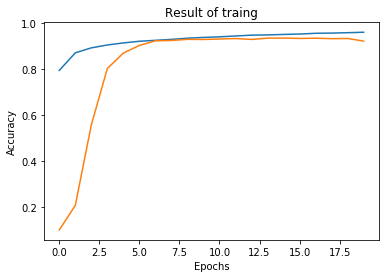

In [9]:
plt.title('Result of traing')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(history.history['acc'], label="Training Accuracy")
plt.plot(history.history['val_acc'], label="Validation Accuracy")

plt.show()